<a href="https://colab.research.google.com/github/aglucaci/AlignmentProfiles/blob/main/AlignmentChecker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Download test dataset
!wget -O MACSE2_Out_Codons.fas https://raw.githubusercontent.com/aglucaci/EvolutionOfNeurotrophins/master/analysis/MACSE2_Out_Codons.fas
!ls -lhs

--2021-02-01 14:48:23--  https://raw.githubusercontent.com/aglucaci/EvolutionOfNeurotrophins/master/analysis/MACSE2_Out_Codons.fas
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625292 (611K) [text/plain]
Saving to: ‘MACSE2_Out_Codons.fas’

MACSE2_Out_Codons.f 100%[===================>] 610.64K  --.-KB/s    in 0.06s   

2021-02-01 14:48:23 (10.7 MB/s) - ‘MACSE2_Out_Codons.fas’ saved [625292/625292]

total 616K
612K -rw-r--r-- 1 root root 611K Feb  1 14:48 MACSE2_Out_Codons.fas
4.0K drwxr-xr-x 1 root root 4.0K Jan 20 17:27 sample_data


In [2]:
# Installers
!pip install biopython

     |████████████████████████████████| 2.3MB 4.2MB/s 


In [3]:
# Imports
from Bio import SeqIO
import pandas as pd
from pandas.plotting import scatter_matrix
import random
from matplotlib import pyplot as plt
import itertools
import numpy as np
from matplotlib.pyplot import figure
from Bio.Seq import Seq

In [4]:
# Declares
input_file = "MACSE2_Out_Codons.fas" # hard-coded

In [6]:
# Classes
class AlignmentChecker(): # Loads in a fasta dictionary

  UniversalCodonCode = {}

  CodonTable = {'A': {'GCA': 0, 'GCC': 0, 'GCG': 0, 'GCT': 0},
                'C': {'TGC': 0, 'TGT': 0},
                'D': {'GAC': 0, 'GAT': 0},
                'E': {'GAA': 0, 'GAG': 0},
                'F': {'TTC': 0, 'TTT': 0},
                'G': {'GGA': 0, 'GGC': 0, 'GGG': 0, 'GGT': 0},
                'H': {'CAC': 0, 'CAT': 0},
                'I': {'ATA': 0, 'ATC': 0, 'ATT': 0},
                'K': {'AAA': 0, 'AAG': 0},
                'L': {'CTA': 0, 'CTC': 0, 'CTG': 0, 'CTT': 0, 'TTA': 0, 'TTG': 0},
                'M': {'ATG': 0},
                'N': {'AAC': 0, 'AAT': 0},
                'P': {'CCA': 0, 'CCC': 0, 'CCG': 0, 'CCT': 0},
                'Q': {'CAA': 0, 'CAG': 0},
                'R': {'AGA': 0, 'AGG': 0, 'CGA': 0, 'CGC': 0, 'CGG': 0, 'CGT': 0},
                'S': {'AGC': 0, 'AGT': 0, 'TCA': 0, 'TCC': 0, 'TCG': 0, 'TCT': 0},
                'T': {'ACA': 0, 'ACC': 0, 'ACG': 0, 'ACT': 0},
                'V': {'GTA': 0, 'GTC': 0, 'GTG': 0, 'GTT': 0},
                'W': {'TGG': 0},
                'X': {'CAN': 0,
                      'NAT': 0,
                      'NCA': 0,
                      'NCT': 0,
                      'NGG': 0,
                      'NNC': 0,
                      'NTC': 0,
                      'NTT': 0},
                'Y': {'TAC': 0, 'TAT': 0}}

  def __init__(self, FASTA_FILE):
    self.FASTA_DICT = self.process_sites(FASTA_FILE)
    self.num_sites = self.get_num_sites()
    self.num_sequences = self.get_num_sequences()
    self.alignment_type = "DNA" # Default
    self.gap_character = "-" # Default
    self.DNA_Characters = ["T", "C", "G", "A"]
  #end method

  def get_num_sites(self):
    for item in self.FASTA_DICT.keys():
      num_sites = len(self.FASTA_DICT[item].keys())
      break
    #end for
    return num_sites
  #end method

  def get_num_sequences(self):
    return len(self.FASTA_DICT.keys())
  #end method

  def process_sites(self, input_file):                                # generally initalizes the class.
    fasta_sequence = SeqIO.parse(open(input_file),'fasta')
    fasta_dict = {}                                                   #init
    for record in fasta_sequence:                                     #loops over each species
      ID, SEQ, site_count, nt_num = record.id, record.seq, 1, 0
      fasta_dict[ID] = {}                                             #init
      while SEQ[nt_num:nt_num+3]:                                     # loop over codons
        codon = str(SEQ[nt_num:nt_num+3])
        fasta_dict[ID]["Site" + str(site_count)] = codon
        site_count += 1
        nt_num += 3
      #end while
    #end for
    return fasta_dict
  #end method

  def gaps_distribution(self):
    gap_freq, site_count = [], 1
    while site_count <= self.num_sites:
      column_codons = []
      for num_species, species in enumerate(self.FASTA_DICT.keys()):  # Loop over each species in the alignment.
        Site = "Site" + str(site_count)                               # For this site (site_count) get the codon, and add it to the list.
        if self.FASTA_DICT[species].get(Site) != None:                # make sure key exists
          codon = self.FASTA_DICT[species][Site]
          column_codons.append(codon)                                 # Generate list of Codons at that site.
        else:
          break                                                       # A key error has been reached, no more sites.
        #end if
      #end for
      num_gaps = 0
      num_gaps = column_codons.count("---")                           # Analyze this Site (column in an alignment)
      if num_gaps != 0:
        gap_freq.append(num_gaps/len(column_codons))
      else:
        gap_freq.append(0)
      site_count += 1
    #end while
    return gap_freq
  #end method

  def ambiguous_characters(self):
    output = {}
    for num_species, species in enumerate(self.FASTA_DICT.keys()): #Loop over the sequences,
      #print("Searching over:", species) # Loop over the sites in each sequence
      site_count = 1
      while site_count <= self.num_sites:
        Site = "Site" + str(site_count) 
        codon = self.FASTA_DICT[species][Site]
        #print(Site, codon)
        for nt in codon: # are any characters beside DNA or gap char?
          if nt.upper() not in self.DNA_Characters and nt.upper() != self.gap_character: #char is not a DNA or gap
            try:
              output[species] += [site_count, codon]
            except:
              output[species] = [site_count, codon]
            #end try
          #end if
        #end inner for
        site_count += 1
      #end while
    #end outer for
    return output # Output should be just the taxa name for now.
  #end method

  def codon_diversity(self):
    assert(self.FASTA_DICT != None, "Error")                          # simple checks
    output, site_count = [], 1
    while site_count <= self.num_sites:
      column_codons = []
      for num_species, species in enumerate(self.FASTA_DICT.keys()):  # Loop over each species in the alignment.
        Site = "Site" + str(site_count)                               # For this site (site_count) get the codon, and add it to the list.
        if self.FASTA_DICT[species].get(Site) != None:                # make sure key exists
          codon = self.FASTA_DICT[species][Site]
          column_codons.append(codon)                                 # Generate list of Codons at that site.
        else:
          break                                                       # A key error has been reached, no more sites.
        #end if
      #end for
      codon_set = set(column_codons)                                  # check for variance.
      num_unique = len(codon_set)
      if "---" in codon_set: num_unique -= 1                          # In this case, we do NOT count a gap site ("---") as a codon.
      output.append(num_unique)
      site_count += 1
    #end while
    return output # returns a list of codon diversity (number of codons) at each site
  #end method

  def invariant_sites(self):
    assert(self.FASTA_DICT != None, "Error") # simple checks
    output, site_count = [], 1
    while site_count <= self.num_sites:
      column_codons = []
      for num_species, species in enumerate(self.FASTA_DICT.keys()):  # Loop over each species in the alignment.
        Site = "Site" + str(site_count)         # For this site (site_count) get the codon, and add it to the list.
        if self.FASTA_DICT[species].get(Site) != None: # make sure key exists
          codon = self.FASTA_DICT[species][Site]
          column_codons.append(codon) # Generate list of Codons at that site.
        else:
          break # A key error has been reached, no more sites.
        #end if
      #end for
      codon_set = set(column_codons) # check for variance.
      num_unique = len(codon_set)
      if "---" in codon_set: num_unique -= 1  # In this case, we do NOT count a gap site ("---") as a codon.
      if num_unique == 1:  # Is there more than 1 codon at this site? If so, it is variant. 
        output.append(site_count)
      #end if
      site_count += 1
    #end while
    return output # returns a list of invariant sites.
  #end method

  def get_site_sequence(self, Site):
    column_codons = []
    for num_species, species in enumerate(self.FASTA_DICT.keys()):  # Loop over each species in the alignment.
      if self.FASTA_DICT[species].get(Site) != None: # make sure key exists
        codon = self.FASTA_DICT[species][Site]
        column_codons.append(codon) # Generate list of Codons at that site.
      #end if
    #end for
    return column_codons # returns a list, with the codons at a particular site in an alignment. This loses taxa info though.
  #end method

  def get_full_sequence(self, TAXA_Name):
      output = []
      site_count = 1
      while site_count <= self.num_sites:
        Site = "Site" + str(site_count) 
        codon = self.FASTA_DICT[TAXA_Name][Site]
        output.append(codon)
        site_count += 1
      #end while
      return output # actually outputs a list of codons
  #end method

  def calculate_hamming_distance(self, chain1, chain2):
    return sum(c1 != c2 for c1, c2 in zip(chain1, chain2))

  def pairwise_distances(self):
    pairwise_dict = {}
    species = list(TEST.FASTA_DICT.keys())
    # list(itertools.combinations(species, 2))
    for n, pair in enumerate(list(itertools.combinations(species, 2))):
      #print(n, pair)
      A = pair[0]
      B = pair[1]
      A_seq = "".join(self.get_full_sequence(A))
      B_seq = "".join(self.get_full_sequence(B))
      HD = self.calculate_hamming_distance(A_seq, B_seq)
      try:
        pairwise_dict[A][B] = HD
      except:
        pairwise_dict[A] = {B: HD}
      #end try
      #pairwise_dict[A][B] = HD
    #end for
    return pairwise_dict
  #end method

  def RSCU_forEachSpecies(self):
    # Each species would have its own RSCU
    #for single_amino_acid in Amino_Acids:
    #dict[AA] = {"Codon1": observed_number_for_codon1, "Codon2": observed_number_for_codon}
    #X_average = (sum(dict[AA]) / num_of_codons_for[AA])
    # Each species would have its own RSCU
    RSCU_counts = {}
    for num_species, species in enumerate(self.FASTA_DICT.keys()):  # Loop over each species in the alignment.
      #RSCU_counts[species] = {}
      # Get the codons for this species
      codon_list = self.get_full_sequence(species)
      for codon in codon_list:
        if codon == "---": continue
        AminoAcid = str(Seq(codon).translate())

        try:
          RSCU_counts[species][AminoAcid][codon] += 1
        except:
          RSCU_counts[species][AminoAcid] = {codon : 1}
        #end try
      #end for
    #end for

    # Convert counts into RSCU frequency
    RSCU_dict = {}
    # For each Amino acid which the species (sequence) uses.
    # m = number of codons for an amino acid
    # X_i = observed numer of ith codon for the amino acid
    # X_bar =  
    return RSCU_counts
  #end method

  def RSCU(self):
    RSCU_counts = AlignmentChecker.CodonTable
    for num_species, species in enumerate(self.FASTA_DICT.keys()):  # Loop over each species in the alignment.
      # Get the codons for this species
      #print(species)
      codon_list = self.get_full_sequence(species)
      #print(codon_list)
      for codon in codon_list:
        if codon == "---": continue                                 # skip gaps
        AminoAcid = str(Seq(codon).translate())
        RSCU_counts[AminoAcid][codon] += 1
      #end for
    #end for

    # Convert counts into RSCU frequency
    RSCU_dict = AlignmentChecker.CodonTable
    # For each Amino acid which the species (sequence) uses.
    # m = number of codons for an amino acid
    # X_i = observed numer of ith codon for the amino acid
    # X_bar =  sum(X_i)/m
    for AA in RSCU_counts.keys():
      m = len(RSCU_counts[AA]) # number of codons
      # Calculate sum
      X_bar = 0
      for codon in RSCU_counts[AA]:
        X_bar += RSCU_counts[AA][codon]
      #end for
      X_bar = X_bar / m
      for codon in RSCU_counts[AA]:
        X_i = RSCU_counts[AA][codon]
        RSCU_dict[AA][codon] = X_i / X_bar
      #end for
    return RSCU_dict

#end class

<ipython-input-6-1164fec376ca>:121: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(self.FASTA_DICT != None, "Error")                          # simple checks
<ipython-input-6-1164fec376ca>:144: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(self.FASTA_DICT != None, "Error") # simple checks


In [13]:
# Helper function

def search(values, searchFor):
    for k in values:
        for v in values[k]:
            if searchFor in v:
                return k
            #end if
        #end for
    #end for
    return None
#end method

In [7]:
TEST = AlignmentChecker(input_file)
#print(TEST.FASTA_DICT.keys())

print("# Loaded an alignment from:", input_file)
print("# This alignment contains", TEST.num_sequences, "sequences")
print("# This alignment contains", TEST.num_sites, "sites")
print("# Number of invariant sites in alignment:", len(TEST.invariant_sites()))
print("# Fraction of invariant sites in alignment:", len(TEST.invariant_sites())/TEST.num_sites)
gap_list = TEST.gaps_distribution()
avg_gap = sum(gap_list)/ len(gap_list)
print("# Average measure of gappiness in alignment is:", avg_gap)
print("# Maximum measure of gappiness in alignment at a particular site is:", max(gap_list))
print("# Minimum measure of gappiness in alignment at a particular site is:", min(gap_list))


#TODO:
# N Fraction: Average, min, max
# GC Content
# NT frequencies
# Codon frequencies


# Loaded an alignment from: MACSE2_Out_Codons.fas
# This alignment contains 319 sequences
# This alignment contains 616 sites
# Number of invariant sites in alignment: 146
# Fraction of invariant sites in alignment: 0.237012987012987
# Average measure of gappiness in alignment is: 0.5587367178276251
# Maximum measure of gappiness in alignment at a particular site is: 0.9968652037617555
# Minimum measure of gappiness in alignment at a particular site is: 0


In [8]:
print("# Searching for ambiguous characters")
ambig_chars = TEST.ambiguous_characters() #actually returns the taxa names.
#print(ambig_chars)
for item in ambig_chars:
  print(item, ambig_chars[item])

# Searching for ambiguous characters
XM_011226480.3 [126, 'NAT']
XM_008686880.1 [126, 'NAT']
XM_026412272.1 [291, 'CAN']
XM_006195083.3 [146, 'NCA']
XM_031459858.1 [146, 'NCA']
XM_031681074.1 [146, 'NCA']
XM_030333208.1 [89, 'NTT']
XM_014545223.1 [106, 'NTC']
XM_022583733.1 [100, 'NTT']
XM_020177315.1 [108, 'NGG']
XM_021151236.2 [99, 'NCT']
XM_021192829.2 [99, 'NCT']
XM_033764060.1 [309, 'NNC', 309, 'NNC']
XM_028957024.1 [407, 'NNC', 407, 'NNC']


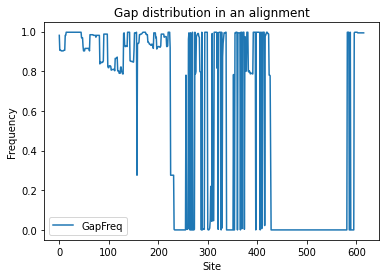

In [9]:
plt.plot(TEST.gaps_distribution(), label="GapFreq")
plt.xlabel("Site")
plt.ylabel("Frequency")
plt.title('Gap distribution in an alignment')
plt.legend()
plt.show()

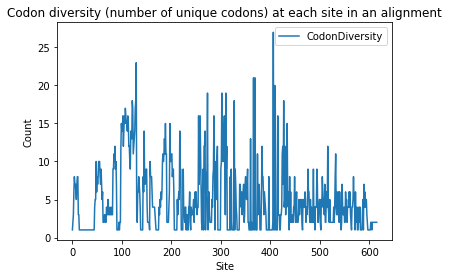

In [10]:
plt.plot(TEST.codon_diversity(), label="CodonDiversity")
plt.xlabel("Site")
plt.ylabel("Count")
plt.title('Codon diversity (number of unique codons) at each site in an alignment')
plt.legend()
plt.show()

# Does not consider synyonymous codons, just 'unique' codons at sites.
# ^ this needs to be accounted for in the future.

# Calculating pairwise hamming distances
# Plotting


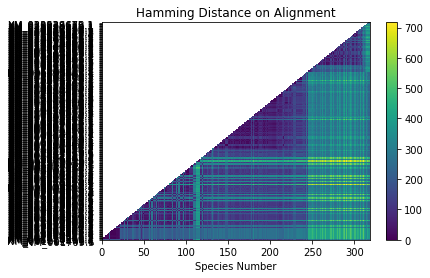

In [11]:
# Process Data
print("# Calculating pairwise hamming distances")
HD_dict = TEST.pairwise_distances()

# Convert to dataframe (makes it easier to plot)
df = pd.DataFrame.from_dict(HD_dict, orient='index')
# Can save the df here.

# Plot
print("# Plotting")
#figure(num=None, figsize=(18, 16), dpi=300, facecolor='w', edgecolor='k')
df = pd.DataFrame.from_dict(HD_dict, orient='index')
plt.pcolormesh(df)
plt.yticks(np.arange(0.005, len(df.index), 1), df.index)
#plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.xlabel("Species Number")
plt.colorbar()
plt.title("Hamming Distance on Alignment")
plt.show()

# Histogram, mean distribution of distances
#df.describe()

#df2 = df.describe().transpose()
#df2 = df2.loc[df2['mean']]
#df2['mean'].hist()
#df2['mean'].plot.bar()

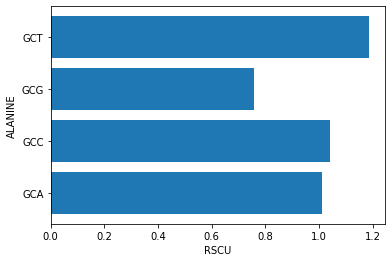

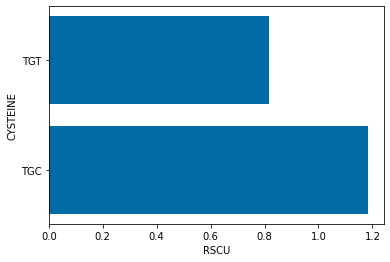

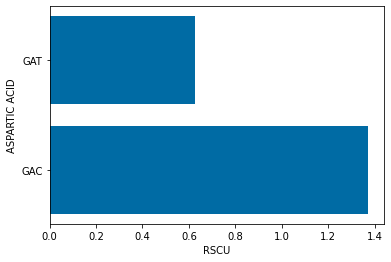

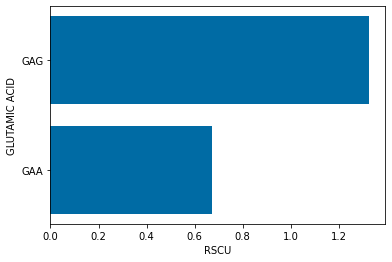

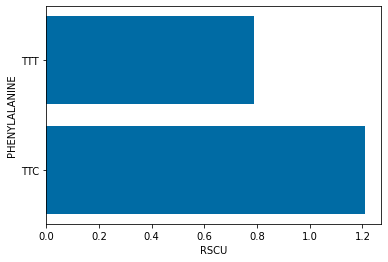

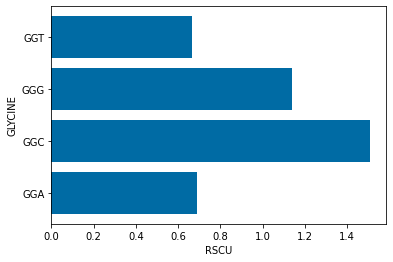

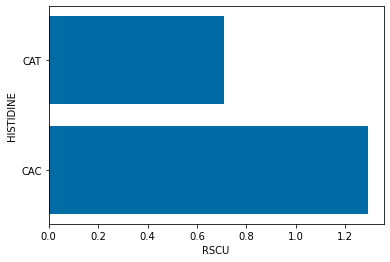

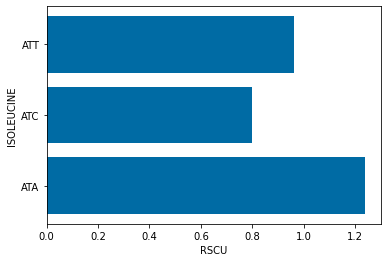

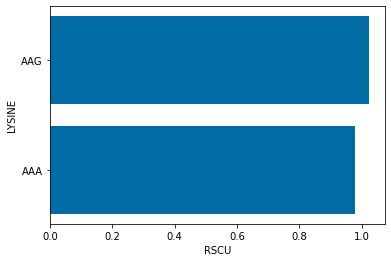

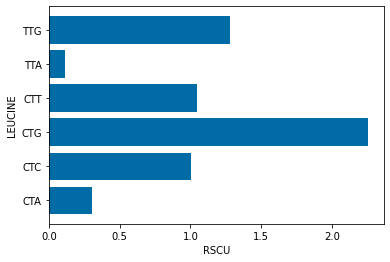

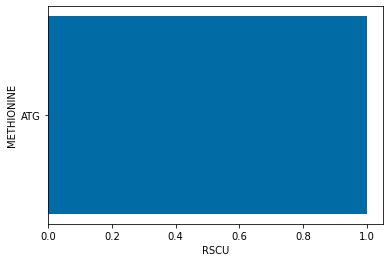

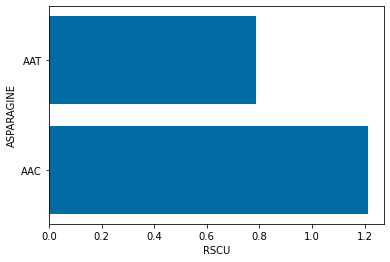

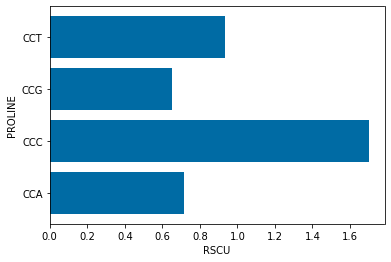

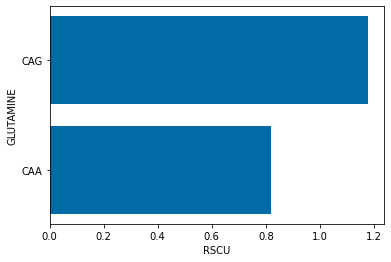

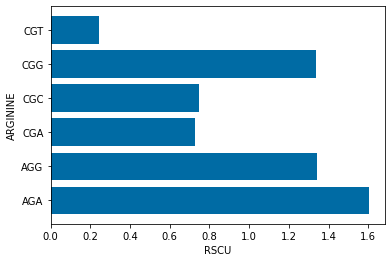

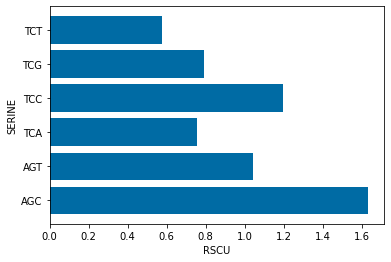

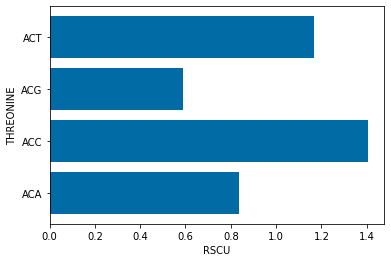

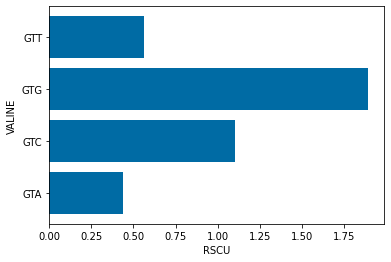

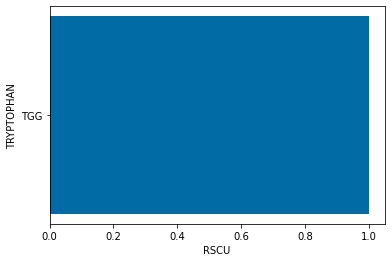

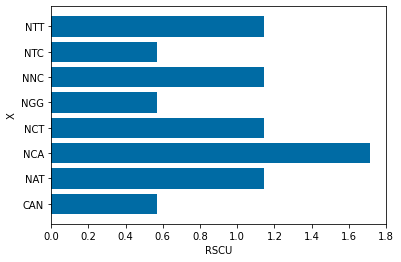

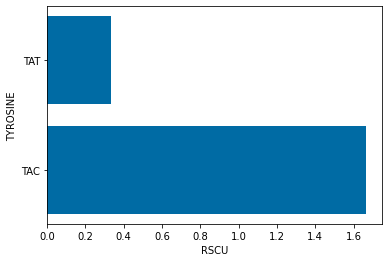

In [12]:
#import Bio
#help(Bio.SeqUtils.IUPACData)

data = TEST.RSCU()

# http://www.cryst.bbk.ac.uk/education/AminoAcid/the_twenty.html
c = {'CYS': 'C', 'ASP': 'D', 'SER': 'S', 'GLN': 'Q', 'LYS': 'K',
     'ILE': 'I', 'PRO': 'P', 'THR': 'T', 'PHE': 'F', 'ASN': 'N', 
     'GLY': 'G', 'HIS': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W', 
     'ALA': 'A', 'VAL':'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M'}

d = {'CYSTEINE': 'C', 'ASPARTIC ACID': 'D', 'SERINE': 'S', 'GLUTAMINE': 'Q', 'LYSINE': 'K',
     'ISOLEUCINE': 'I', 'PROLINE': 'P', 'THREONINE': 'T', 'PHENYLALANINE': 'F', 'ASPARAGINE': 'N', 
     'GLYCINE': 'G', 'HISTIDINE': 'H', 'LEUCINE': 'L', 'ARGININE': 'R', 'TRYPTOPHAN': 'W', 
     'ALANINE': 'A', 'VALINE':'V', 'GLUTAMIC ACID': 'E', 'TYROSINE': 'Y', 'METHIONINE': 'M'}
     
#print(plt.style.available)

for AA in data.keys():
  #plt.barh(list(data[AA].keys()), data[AA].values(), color='g')
  plt.barh(list(data[AA].keys()), data[AA].values())
  plt.style.use('tableau-colorblind10')
  plt.xlabel("RSCU")
  AA_name = search(d, AA)
  if AA_name == None: AA_name = "X"
  plt.ylabel(AA_name)
  plt.savefig(input_file + "_CodonFrequency_"+AA_name+".png", dpi=300)
  plt.show()

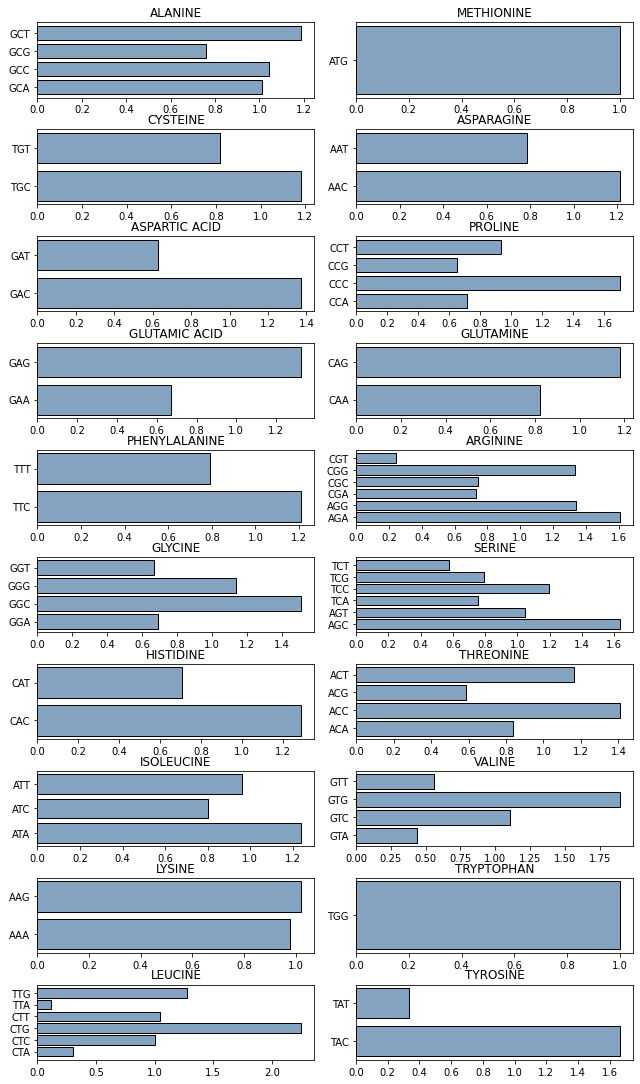

In [32]:

# Gather data
data = TEST.RSCU()

# http://www.cryst.bbk.ac.uk/education/AminoAcid/the_twenty.html
c = {'CYS': 'C', 'ASP': 'D', 'SER': 'S', 'GLN': 'Q', 'LYS': 'K',
     'ILE': 'I', 'PRO': 'P', 'THR': 'T', 'PHE': 'F', 'ASN': 'N', 
     'GLY': 'G', 'HIS': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W', 
     'ALA': 'A', 'VAL':'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M'}

d = {'CYSTEINE': 'C', 'ASPARTIC ACID': 'D', 'SERINE': 'S', 'GLUTAMINE': 'Q', 'LYSINE': 'K',
     'ISOLEUCINE': 'I', 'PROLINE': 'P', 'THREONINE': 'T', 'PHENYLALANINE': 'F', 'ASPARAGINE': 'N', 
     'GLYCINE': 'G', 'HISTIDINE': 'H', 'LEUCINE': 'L', 'ARGININE': 'R', 'TRYPTOPHAN': 'W', 
     'ALANINE': 'A', 'VALINE':'V', 'GLUTAMIC ACID': 'E', 'TYROSINE': 'Y', 'METHIONINE': 'M'}

#print(plt.style.available)

fig, axs = plt.subplots(10, 2)
fig.set_size_inches(9, 15, forward=True)
fig.tight_layout()
#fig.suptitle('Horizontally stacked subplots')
#ax1.plot(x, y)
#ax2.plot(x, -y)

row, col = 0, 0
for AA in data.keys(): # Subplots
  if AA == "X": continue # Skip ambiguous AA, we want the core 20
  
  axs[row, col].barh(list(data[AA].keys()), data[AA].values(), color=(0.2, 0.4, 0.6, 0.6), edgecolor='black')
  axs[row, col].set_title(search(d, AA))
  row += 1
  if row == 10: 
    col += 1
    row = 0
  
  #plt.barh(list(data[AA].keys()), data[AA].values(), color='g')
  #plt.barh(list(data[AA].keys()), data[AA].values())
  #plt.style.use('tableau-colorblind10')
  #plt.xlabel("RSCU")
  #AA_name = search(d, AA)
  #if AA_name == None: AA_name = "X"
  #plt.ylabel(AA_name)
  ##plt.savefig(input_file + "_CodonFrequency_"+AA_name+".png", dpi=300)
  #plt.show()

# **Testing code below, you can ignore**

In [ ]:
x = TEST.invariant_sites()
print(x)
print(len(x))
print("Fraction of invariant sites in alignment:", len(x)/TEST.num_sites)

[1, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 91, 92, 93, 94, 96, 139, 140, 141, 142, 143, 157, 170, 171, 172, 173, 174, 175, 207, 208, 209, 210, 211, 212, 221, 222, 223, 224, 231, 233, 235, 240, 263, 266, 270, 275, 289, 295, 296, 297, 298, 299, 300, 314, 315, 316, 317, 318, 319, 321, 324, 325, 326, 327, 329, 334, 335, 336, 337, 338, 358, 359, 360, 362, 364, 365, 368, 369, 372, 373, 374, 380, 381, 382, 393, 394, 395, 396, 397, 399, 400, 401, 402, 403, 404, 405, 408, 409, 412, 413, 414, 415, 420, 421, 439, 466, 491, 503, 544, 565, 572, 577, 578, 583, 584, 585, 586, 589, 598, 599, 600, 601, 602, 603, 606]
146
Fraction of invariant sites in alignment: 0.237012987012987


In [ ]:
def hamming_distance(chain1, chain2):
    return sum(c1 != c2 for c1, c2 in zip(chain1, chain2))
    

In [ ]:
hamming_distance("AAA", "ATG")

2

In [ ]:
import itertools
x = list(TEST.FASTA_DICT.keys())
#list(itertools.combinations(x, 2))
for pair in list(itertools.combinations(x, 2)):
  A = pair[0]
  B = pair[1]
  print(A,B)

In [ ]:
codons = TEST.get_full_sequence('XM_005578346.2')
"".join(codons)

'------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ATGAGACACTTGAATGCAGCTGCC------------------------ACCGCTGCTGTGGGGCCGGCGGGGAGCAGCACCGCGACGAGGACCCGGGCTGGGCGCTGGAGCCAGAATCGGAACCACGATGTGACTCCGCCGCCG---------------------------------------GGGACCCGTGAGCTTTGTGTGGACCCC---------------GAG---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------TTCCACCAGGTGAGAAGAGTGATGACCATCCTTTTCCTTACTATGGTTATTTCATACTTTGGTTGCATGAAGGCTGCCCCCATGAAAGAAGCA---AACATCCGAGGA------CAAGGT---GGCTTGGCC---TACCCAGGTGTG---------------------------------------CGG---ACCCATGGGACTCTG------------------GAGAGCGTGAATGGGCCCAAGGCAGGT---TCAAGAGGC------------------------CTG---------------ACA---TCA---------

In [ ]:
a = Seq("ATG")
a.translate()

Seq('M')

In [ ]:
a = Seq("---")
a.translate()

Seq('-')

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [ ]:
!ls -lhs

total 2.1M
612K -rw-r--r-- 1 root root 611K Jan 30 19:35  MACSE2_Out_Codons.fas
 68K -rw-r--r-- 1 root root  65K Jan 30 20:44  MACSE2_Out_Codons.fas_CodonFrequency_ALANINE.png
 72K -rw-r--r-- 1 root root  72K Jan 30 20:44  MACSE2_Out_Codons.fas_CodonFrequency_ARGININE.png
 64K -rw-r--r-- 1 root root  63K Jan 30 20:44  MACSE2_Out_Codons.fas_CodonFrequency_ASPARAGINE.png
 68K -rw-r--r-- 1 root root  65K Jan 30 20:44 'MACSE2_Out_Codons.fas_CodonFrequency_ASPARTIC ACID.png'
 68K -rw-r--r-- 1 root root  66K Jan 30 20:43  MACSE2_Out_Codons.fas_CodonFrequency_ASPARTIC_ACID.png
 56K -rw-r--r-- 1 root root  56K Jan 30 20:44  MACSE2_Out_Codons.fas_CodonFrequency_CYSTEINE.png
 64K -rw-r--r-- 1 root root  64K Jan 30 20:44 'MACSE2_Out_Codons.fas_CodonFrequency_GLUTAMIC ACID.png'
 64K -rw-r--r-- 1 root root  64K Jan 30 20:43  MACSE2_Out_Codons.fas_CodonFrequency_GLUTAMIC_ACID.png
 60K -rw-r--r-- 1 root root  60K Jan 30 20:44  MACSE2_Out_Codons.fas_CodonFrequency_GLUTAMINE.png
 60K -rw-r--r-- 1 root 

In [ ]:
#!zip -r /content/file.zip /content/Folder_To_Zip
!zip -r /content/file.zip *.png

from google.colab import files
files.download("/content/file.zip")

updating: MACSE2_Out_Codons.fas_CodonFrequency_ALANINE.png (deflated 49%)
updating: MACSE2_Out_Codons.fas_CodonFrequency_ARGININE.png (deflated 45%)
updating: MACSE2_Out_Codons.fas_CodonFrequency_ASPARAGINE.png (deflated 49%)
updating: MACSE2_Out_Codons.fas_CodonFrequency_ASPARTIC ACID.png (deflated 47%)
updating: MACSE2_Out_Codons.fas_CodonFrequency_ASPARTIC_ACID.png (deflated 47%)
updating: MACSE2_Out_Codons.fas_CodonFrequency_CYSTEINE.png (deflated 55%)
updating: MACSE2_Out_Codons.fas_CodonFrequency_GLUTAMIC ACID.png (deflated 48%)
updating: MACSE2_Out_Codons.fas_CodonFrequency_GLUTAMIC_ACID.png (deflated 48%)
updating: MACSE2_Out_Codons.fas_CodonFrequency_GLUTAMINE.png (deflated 51%)
updating: MACSE2_Out_Codons.fas_CodonFrequency_GLYCINE.png (deflated 51%)
updating: MACSE2_Out_Codons.fas_CodonFrequency_HISTIDINE.png (deflated 54%)
updating: MACSE2_Out_Codons.fas_CodonFrequency_ISOLEUCINE.png (deflated 51%)
updating: MACSE2_Out_Codons.fas_CodonFrequency_LEUCINE.png (deflated 51%)
up

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>